 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [175]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [65]:
# Reading whale returns
whale_returns_csv = Path("whale_returns.csv")
whale_df = pd.read_csv(whale_returns_csv, parse_dates=True, index_col = "Date", infer_datetime_format=True)
whale_df.sort_index
whale_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [66]:
# Count nulls
whale_df.isna().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [67]:
# Drop nulls
whale_df = whale_df.dropna()
whale_df.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [68]:
# Reading algorithmic returns
algo_returns_csv = Path("../Data_files/algo_returns.csv")
algo_df = pd.read_csv(algo_returns_csv, parse_dates=True, index_col = "Date", infer_datetime_format=True)
algo_df.sort_index
algo_df.head()


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [69]:
# Count nulls
algo_df.isna().sum()


Algo 1    0
Algo 2    6
dtype: int64

In [70]:
# Drop nulls
algo_df = algo_df.dropna()
algo_df.isna().sum()


Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [71]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("../Data_files/sp500_history.csv")
sp500_df = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_df = sp500_df.sort_values(by='Date')
sp500_df.head()



,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [72]:
# Check Data Types
sp500_df.dtypes


Close    object
dtype: object

In [73]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")
sp500_df["Close"]

sp500_df["Close"] = sp500_df["Close"].astype(float)
sp500_df.dtypes

Close    float64
dtype: object

In [74]:
# Calculate Daily Returns
SP500_return = sp500_df.pct_change()
SP500_return.head()


,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [75]:
# Drop nulls
SP500_return = SP500_return.dropna()
SP500_return.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [76]:
# Rename Column
SP500_return.rename(columns = {"Close":"S&P500"}, inplace = True)
SP500_return.head()


,S&P500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [77]:
# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat([whale_df, algo_df, SP500_return], axis="columns")
combined_df 


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2012-10-02,NaN,NaN,NaN,NaN,NaN,NaN,0.000872
2012-10-03,NaN,NaN,NaN,NaN,NaN,NaN,0.003624
2012-10-04,NaN,NaN,NaN,NaN,NaN,NaN,0.007174
2012-10-05,NaN,NaN,NaN,NaN,NaN,NaN,-0.000322
2012-10-08,NaN,NaN,NaN,NaN,NaN,NaN,-0.003457
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,NaN
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,NaN
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,NaN


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

<AxesSubplot:xlabel='Date'>

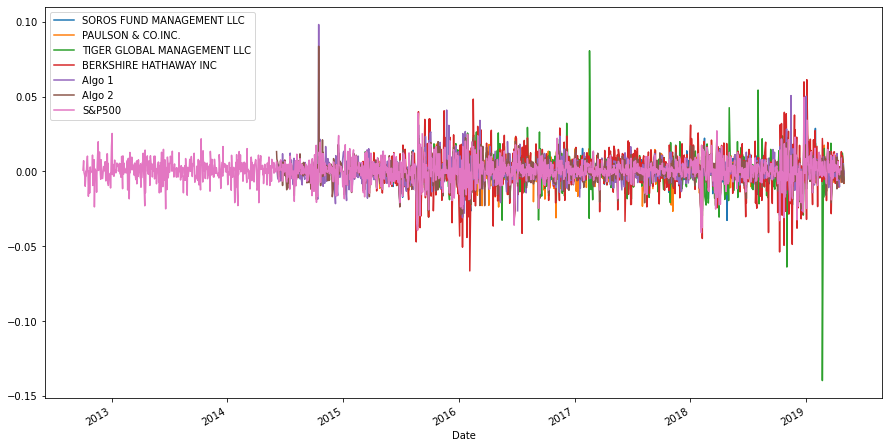

In [183]:
# Plot daily returns
# YOUR CODE HERE
combined_df.plot(figsize=(15,8))

<AxesSubplot:xlabel='Date'>

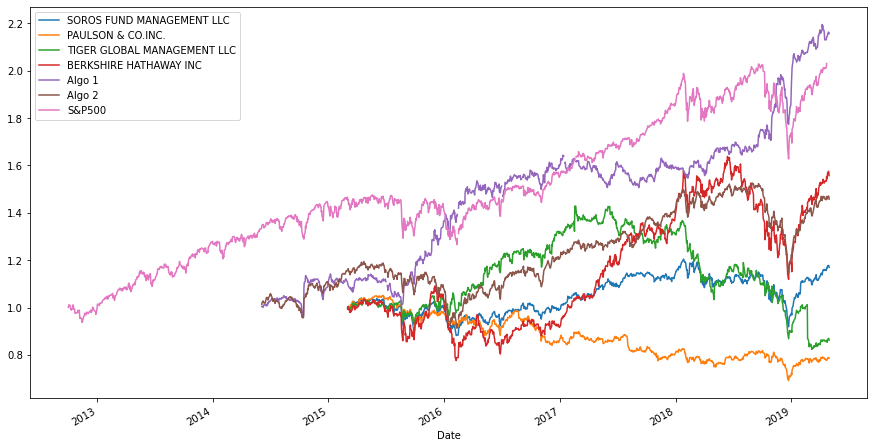

In [184]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + combined_df).cumprod()
cumulative_returns.plot(figsize = (15,8))

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

<AxesSubplot:>

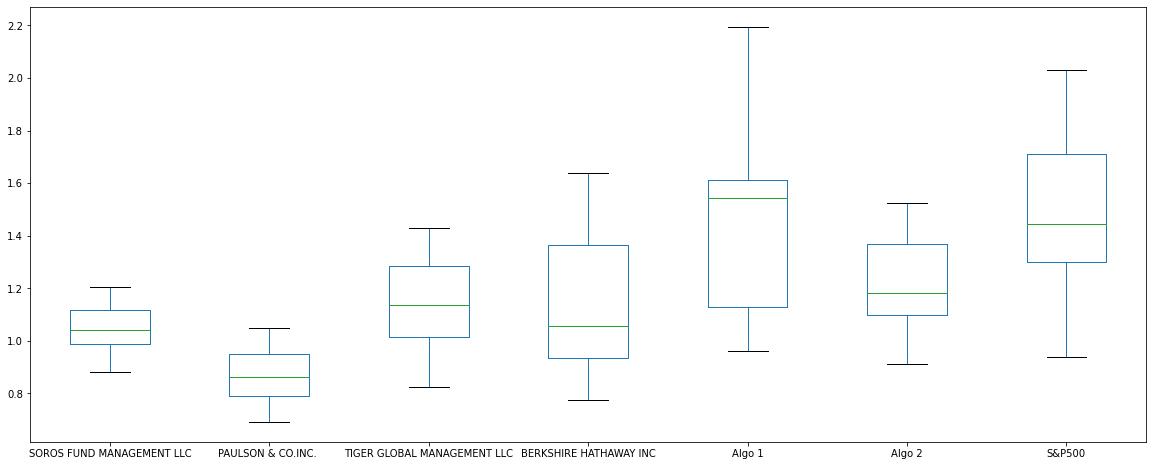

In [80]:
# Box plot to visually show risk
cumulative_returns.plot.box(figsize = (20,8))

In [185]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
portfolio_std = combined_df.std()
portfolio_std


SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
Algo 1                         0.007988
Algo 2                         0.008466
S&P500                         0.008111
dtype: float64

In [82]:
# Determine which portfolios are riskier than the S&P 500
portfolio_std = portfolio_std.sort_values(ascending=False)
portfolio_std


BERKSHIRE HATHAWAY INC         0.012831
TIGER GLOBAL MANAGEMENT LLC    0.010824
Algo 2                         0.008466
S&P500                         0.008111
Algo 1                         0.007988
SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
dtype: float64

Berkshire Hathaway, Tiger Global, and Algo 2 are riskier than the S&P 500

In [83]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = portfolio_std * np.sqrt(252)
annualized_std

BERKSHIRE HATHAWAY INC         0.203682
TIGER GLOBAL MANAGEMENT LLC    0.171830
Algo 2                         0.134401
S&P500                         0.128762
Algo 1                         0.126801
SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
dtype: float64

In [128]:
# YOUR CODE HERE

,GPN,INTU,MELI,My Porfolio
Date,,,,
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,0.005167,0.005545,-0.000819,0.009893
2016-01-06,0.001049,0.001181,-0.007142,-0.004912
2016-01-07,-0.012497,-0.006404,-0.013665,-0.032566
2016-01-08,-0.006410,-0.004588,-0.005959,-0.016957
...,...,...,...,...
2020-10-05,-0.003568,0.009807,0.003474,0.009713
2020-10-06,-0.003021,-0.006016,0.000248,-0.008789
2020-10-07,0.003602,0.009763,0.016374,0.029738


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

<AxesSubplot:xlabel='Date'>

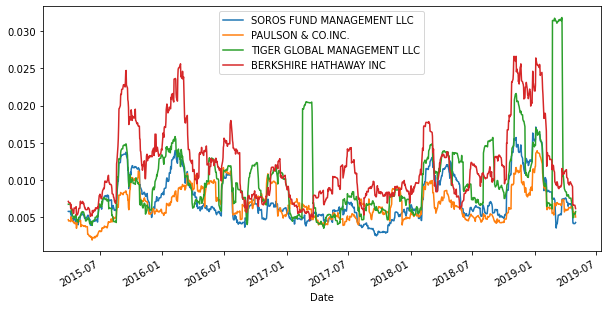

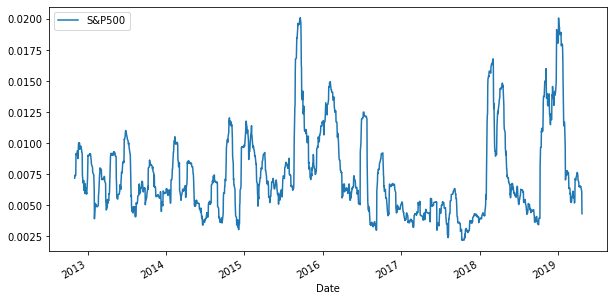

In [84]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
whale_df.rolling(window=21).std().plot(figsize = (10,5))
SP500_return.rolling(window=21).std().plot(figsize = (10,5))

In [85]:
# Construct a correlation table
correlation = combined_df.corr()
correlation


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
SOROS FUND MANAGEMENT LLC,1.000000,0.700181,0.561745,0.754308,0.321366,0.826719,0.837864
PAULSON & CO.INC.,0.700181,1.000000,0.435333,0.545802,0.269257,0.677993,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561745,0.435333,1.000000,0.425102,0.164840,0.508139,0.623946
BERKSHIRE HATHAWAY INC,0.754308,0.545802,0.425102,1.000000,0.292307,0.687717,0.751371
Algo 1,0.321366,0.269257,0.164840,0.292307,1.000000,0.346568,0.264393
Algo 2,0.826719,0.677993,0.508139,0.687717,0.346568,1.000000,0.821981
S&P500,0.837864,0.669732,0.623946,0.751371,0.264393,0.821981,1.000000


In [86]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
tiger_covariance = combined_df['TIGER GLOBAL MANAGEMENT LLC'].cov(combined_df['S&P500'])
SP500_variance = combined_df['S&P500'].var()
tiger_beta = tiger_covariance / SP500_variance 

print(f"Tiger Global Management LLC Beta: {tiger_beta}")



Tiger Global Management LLC Beta: 0.8837124053216363


<AxesSubplot:xlabel='Date'>

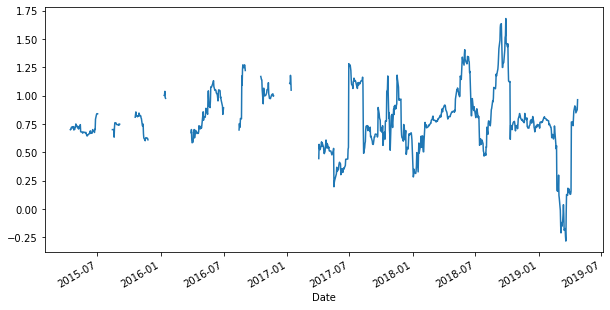

In [87]:
# Calculate a rolling window using the exponentially weighted moving average. 
rolling_tiger_covariance = combined_df['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=30).cov(combined_df['S&P500'])
rolling_variance = combined_df['S&P500'].rolling(window=30).var()
rolling_tiger_beta = rolling_tiger_covariance / rolling_variance
rolling_tiger_beta.plot(figsize = (10,5))  


---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [88]:
# Calculate annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.361568
PAULSON & CO.INC.             -0.462131
TIGER GLOBAL MANAGEMENT LLC   -0.118257
BERKSHIRE HATHAWAY INC         0.619628
Algo 1                         1.300176
Algo 2                         0.639258
S&P500                         0.906028
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

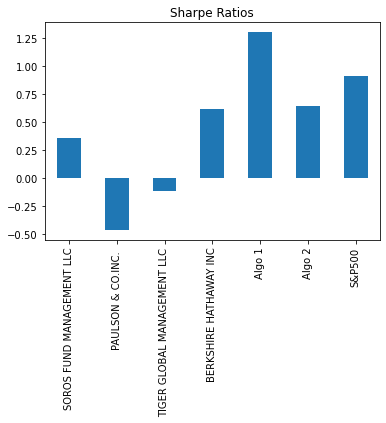

In [89]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---Only Algo 1 outperforms both the market/S&P500 and the whales.  Algo 2 outperforms the whales but not the market. 

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [90]:
# Read the first stock
GPN_csv = Path("../Data_files/GPN_stockdata.csv")
GPN_df = pd.read_csv(GPN_csv, parse_dates=True, index_col = "Date", infer_datetime_format=True)
GPN_df.rename(columns = {"Close":"GPN"}, inplace = True)
GPN_df.sort_index
GPN_df.head()

,GPN
Date,
2016-01-04,62.58
2016-01-05,63.55
2016-01-06,63.75
2016-01-07,61.36
2016-01-08,60.18


In [91]:
# Read the second stock
MELI_csv = Path("../Data_files/MELI_stockdata.csv")
MELI_df = pd.read_csv(MELI_csv, parse_dates=True, index_col = "Date", infer_datetime_format=True)
MELI_df.rename(columns = {"Close":"MELI"}, inplace = True)
MELI_df.sort_index
MELI_df.head()

,MELI
Date,
2016-01-04,109.95
2016-01-05,109.68
2016-01-06,107.33
2016-01-07,102.93
2016-01-08,101.09


In [92]:
# Read the third stock
INTU_csv = Path("../Data_files/INTU_stockdata.csv")
INTU_df = pd.read_csv(INTU_csv, parse_dates = True, index_col="Date", infer_datetime_format = True)
INTU_df.rename(columns = {"Close":"INTU"}, inplace = True)
INTU_df.sort_index
INTU_df.head()

,INTU
Date,
2016-01-04,94.38
2016-01-05,95.95
2016-01-06,96.29
2016-01-07,94.44
2016-01-08,93.14


<AxesSubplot:xlabel='Date'>

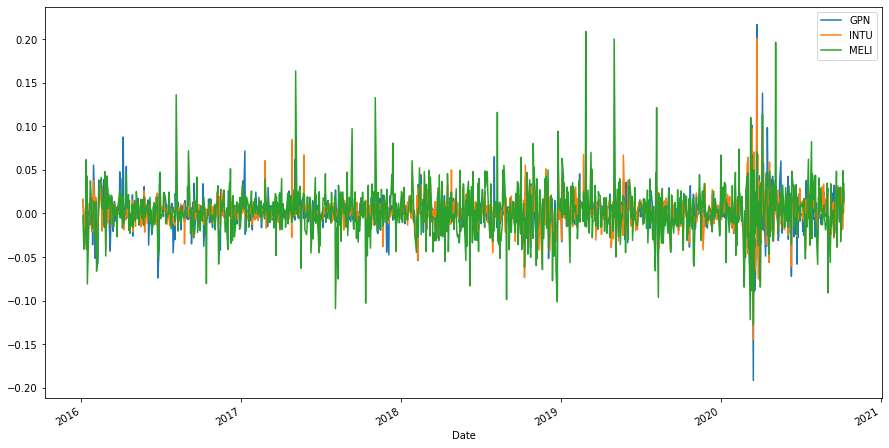

In [93]:
# Concatenate all stocks into a single DataFrame
custom_df = pd.concat([ GPN_df, INTU_df, MELI_df], axis="columns")
custom_return = custom_df.pct_change()
custom_return.head()
custom_return.plot(figsize = (15,8))  

In [94]:
# Reset the index

In [119]:
# Pivot so that each column of prices represents a unique symbol
pivoted_data = custom_return.pivot_table(index="Date")
pivoted_data.head()

,GPN,INTU,MELI
Date,,,
2016-01-05,0.015500,0.016635,-0.002456
2016-01-06,0.003147,0.003544,-0.021426
2016-01-07,-0.037490,-0.019213,-0.040995
2016-01-08,-0.019231,-0.013765,-0.017876
2016-01-11,-0.027584,0.009233,-0.023049


In [120]:
# Drop Nulls
custom_df = custom_df.dropna() 
custom_df.isna().sum()

GPN     0
INTU    0
MELI    0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [145]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
weighted_return = (custom_return * weights)
my_portfolio = weighted_return["GPN"] + weighted_return["INTU"] + weighted_return["MELI"]
weighted_return.insert(3, "My Portfolio", my_portfolio, True)
weighted_return

,GPN,INTU,MELI,My Portfolio
Date,,,,
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,0.005167,0.005545,-0.000819,0.009893
2016-01-06,0.001049,0.001181,-0.007142,-0.004912
2016-01-07,-0.012497,-0.006404,-0.013665,-0.032566
2016-01-08,-0.006410,-0.004588,-0.005959,-0.016957
...,...,...,...,...
2020-10-05,-0.003568,0.009807,0.003474,0.009713
2020-10-06,-0.003021,-0.006016,0.000248,-0.008789
2020-10-07,0.003602,0.009763,0.016374,0.029738


In [146]:
weighted_return = weighted_return[["My Portfolio"]]
weighted_return = weighted_return.dropna()
weighted_return


,My Portfolio
Date,
2016-01-05,0.009893
2016-01-06,-0.004912
2016-01-07,-0.032566
2016-01-08,-0.016957
2016-01-11,-0.013800
...,...
2020-10-05,0.009713
2020-10-06,-0.008789
2020-10-07,0.029738


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [156]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
portfolio_comparison_df = pd.concat([weighted_return, combined_df], axis="columns")
portfolio_comparison_df
 

,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,,
2012-10-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000872
2012-10-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003624
2012-10-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007174
2012-10-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000322
2012-10-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.003457
...,...,...,...,...,...,...,...,...
2020-10-05,0.009713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-06,-0.008789,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-07,0.029738,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_comparison_df = portfolio_comparison_df.dropna() 
portfolio_comparison_df.isna().sum()


My Portfolio                   0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P500                         0
dtype: int64

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

<AxesSubplot:>

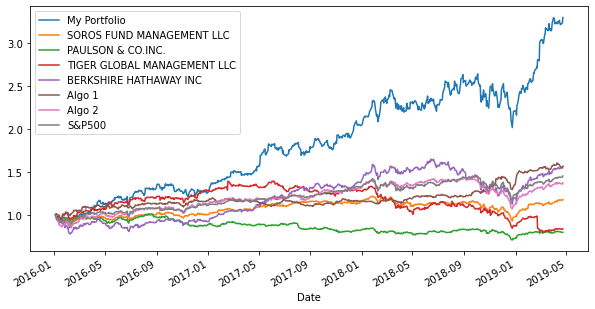

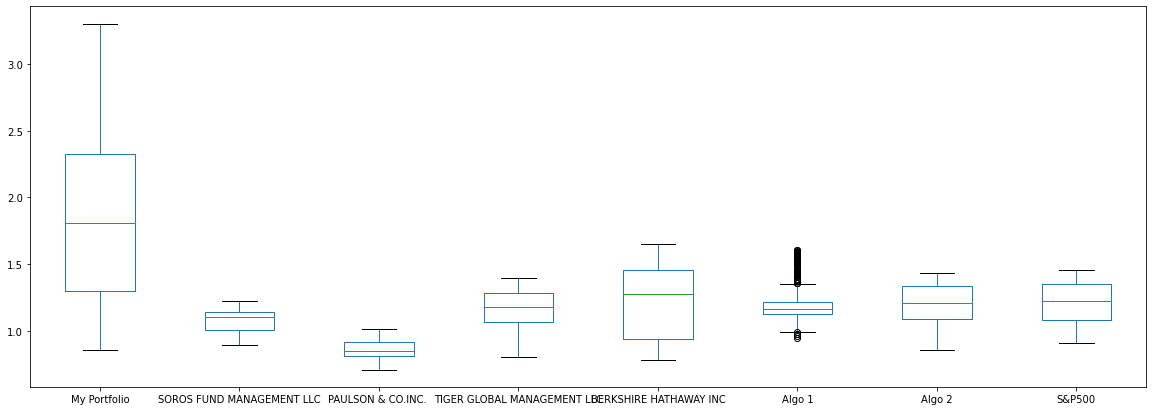

In [158]:
# Risk
portfolio_cumulative = (1 + portfolio_comparison_df).cumprod()
portfolio_cumulative .plot(figsize = (10,5))
portfolio_cumulative .plot.box(figsize = (20,7))

<AxesSubplot:xlabel='Date'>

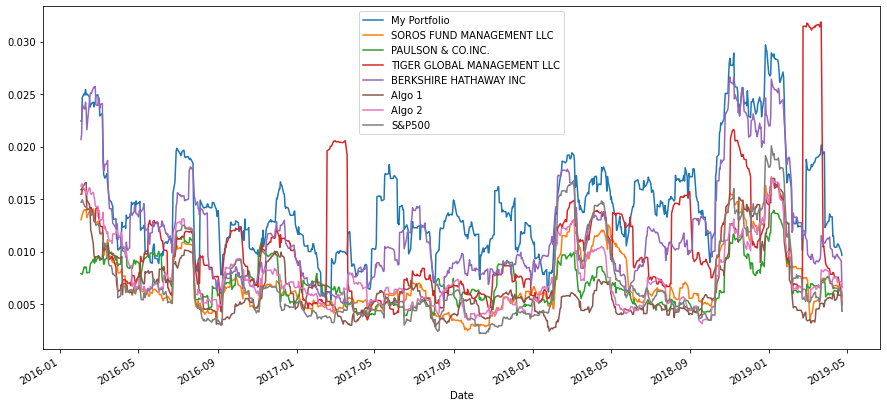

In [186]:
# Rolling
portfolio_comparison_df.rolling(window=21).std().plot(figsize = (15,7))


In [168]:
# Annualized Sharpe Ratios
port_sharpe_ratios = (portfolio_comparison_df.mean() * 252) / (portfolio_comparison_df.std() * np.sqrt(252))
port_sharpe_ratios

My Portfolio                   1.622963
SOROS FUND MANAGEMENT LLC      0.471964
PAULSON & CO.INC.             -0.517669
TIGER GLOBAL MANAGEMENT LLC   -0.192931
BERKSHIRE HATHAWAY INC         0.770941
Algo 1                         1.244566
Algo 2                         0.809963
S&P500                         0.948935
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

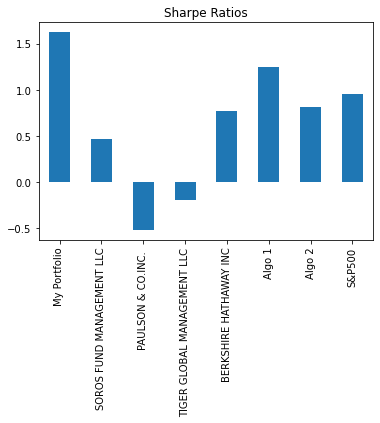

In [169]:
# Visualize the sharpe ratios as a bar plot
port_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [178]:
# Create a correlation analysis
correlation_port = portfolio_comparison_df.corr()
correlation_port


,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
My Portfolio,1.000000,0.680583,0.472245,0.363814,0.726136,0.239088,0.648632,0.732569
SOROS FUND MANAGEMENT LLC,0.680583,1.000000,0.679354,0.513527,0.748421,0.288009,0.814377,0.830200
PAULSON & CO.INC.,0.472245,0.679354,1.000000,0.389220,0.522088,0.250802,0.673784,0.663940
TIGER GLOBAL MANAGEMENT LLC,0.363814,0.513527,0.389220,1.000000,0.376581,0.136751,0.453018,0.570871
BERKSHIRE HATHAWAY INC,0.726136,0.748421,0.522088,0.376581,1.000000,0.276174,0.681076,0.758398
Algo 1,0.239088,0.288009,0.250802,0.136751,0.276174,1.000000,0.272315,0.267796
Algo 2,0.648632,0.814377,0.673784,0.453018,0.681076,0.272315,1.000000,0.859990
S&P500,0.732569,0.830200,0.663940,0.570871,0.758398,0.267796,0.859990,1.000000


<AxesSubplot:xlabel='Date'>

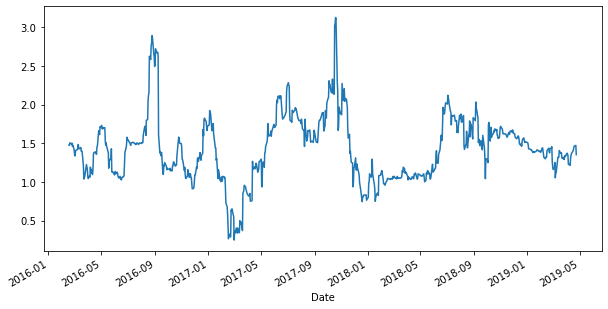

In [182]:
# Beta
my_portfolio_covariance = portfolio_comparison_df['My Portfolio'].rolling(window=30).cov(portfolio_comparison_df['S&P500'])
rolling_variance_port = portfolio_comparison_df['S&P500'].rolling(window=30).var()
my_portfolio_beta = my_portfolio_covariance / rolling_variance_port
my_portfolio_beta.plot(figsize = (10,5))  